In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
def duration(coupon_rate,yield_rate,T,FV=100,Default_prob=0):
    PV = []
    for i in range(1,T):
        default_adjusted = coupon_rate*(1-Default_prob)**i
        PV.append(default_adjusted * FV/((1+yield_rate)**i))
    default_adjusted = (1+coupon_rate)*(1-Default_prob)**T
    PV.append( default_adjusted*FV/(1+yield_rate)**T )
    dmac = np.linspace(1,T,T)*np.array(PV)
    dmac = np.sum(dmac)/np.sum(PV)
    return dmac

In [24]:
def convexity(coupon_rate,yield_rate,T,FV=100):
    PV = []
    for i in range(1,T):
        PV.append(coupon_rate * FV/((1+yield_rate/2)**2*i))
    PV.append( (1+coupon_rate)*FV/(1+yield_rate/2)**2*T )
    conv = np.linspace(1,T,T)*(0.5+np.linspace(1,T,T))*np.array(PV)
    conv = np.sum(conv)/np.sum(PV)
    conv = conv/(1+0.5*yield_rate)**2
    return conv

In [45]:
convexity(0.01,0.99,10)

46.8699875001636

In [46]:
convexity(0.1,0.99,10)

45.9977159583067

In [19]:
10*(11)/(1+0.1)**2

90.90909090909089

In [3]:
coupon_rates = [0,0.001,0.005,0.02,0.11,0.25]
maturities = np.linspace(0,100,101)
dmac_arr = []
yield_rate = 0.1
for maturity in maturities:
    dmac = [duration(coupon,yield_rate,int(maturity)) for coupon in coupon_rates]
    dmac_arr.append(dmac)

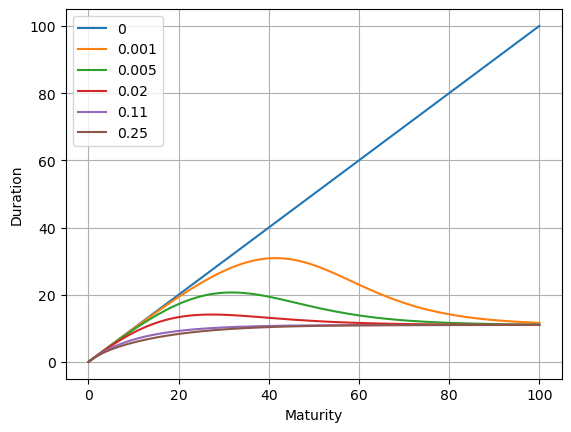

In [4]:
dmac_arr = np.array(dmac_arr)
for i in range(len(coupon_rates)):
    plt.plot(maturities,dmac_arr[:,i], label = f'{str(coupon_rates[i])}')
plt.xlabel("Maturity")
plt.ylabel("Duration")
plt.grid()
plt.legend()
plt.show()

Coupon rate of $0\text{\%}$ means its a simple ZCB whose duration would be equal to maturity and it can be seen in the plot as it is a $y=x$ line. One key property that can be seen for all bonds which do pay coupons is that as maturity becomes higher, the duration is more or less the same for all the bonds. This lines up with the proof we do in $Q7$ as the limiting solution for the duration is basically same as a perpetuity bond. However before the maturity starts dominating, we can see that discount bonds have a global maxima post which duration starts to decline. Whereas the premium bonds are monotonically increasing. This also lines up with the proof we work out in $Q7$. The premium bonds have lower duration than discount bonds and intuitively this is because the premium bonds are very much susceptible to interest rate changes as the payouts are very high compared to that of a discount bond whose value doesn't change as much when rates change